<a href="https://colab.research.google.com/github/VIVEKGANGA/ML_Learning/blob/master/Pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n= 100
x = torch.ones(n, 2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8325,  1.0000],
        [ 0.0974,  1.0000],
        [-0.4467,  1.0000],
        [-0.8468,  1.0000],
        [ 0.3621,  1.0000]])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

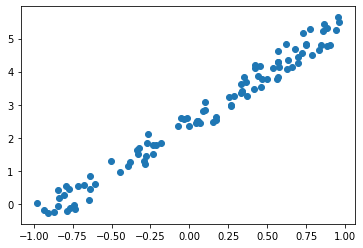

In [0]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)
y_hat = x@a
mse(y_hat, y)

tensor(8.6224)

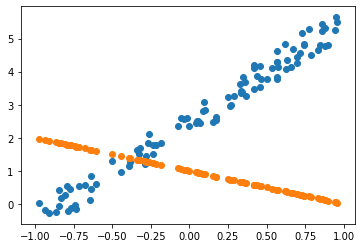

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], y_hat)

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10 == 0: print(loss);
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(8.6224, grad_fn=<MeanBackward0>)
tensor(1.3012, grad_fn=<MeanBackward0>)
tensor(0.3848, grad_fn=<MeanBackward0>)
tensor(0.1533, grad_fn=<MeanBackward0>)
tensor(0.0921, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)
tensor(0.0716, grad_fn=<MeanBackward0>)
tensor(0.0705, grad_fn=<MeanBackward0>)
tensor(0.0702, grad_fn=<MeanBackward0>)
tensor(0.0701, grad_fn=<MeanBackward0>)


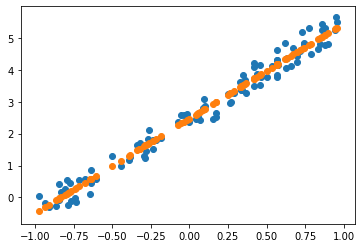

In [0]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a);

In [0]:
from matplotlib import animation, rc
rc("animation", html="jshtml")

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c= "orange")
line, = plt.plot(x[:,0], x@a);
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval = 20)